In [1]:
from wikidata.client import Client
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import pylab

In [2]:
client = Client()

In [3]:
def list_subclasses(query : str):
    
    subclass_list = []
    search = client.get(query, load=True)

    if 'P279' in search.data['claims'].keys():
        
        subclasses = search.data['claims']['P279']
    
        for subclass in subclasses:
            if 'qualifiers' in subclass.keys():
                if 'P642' in subclass['qualifiers'].keys():
                    for s in subclass['qualifiers']['P642']:
                        subclass_list.append(s['datavalue']['value']['id'])
                        subclass_list.append(subclass['mainsnak']['datavalue']['value']['id'])
                else:
                    subclass_list.append(subclass['mainsnak']['datavalue']['value']['id'])
            else:
                subclass_list.append(subclass['mainsnak']['datavalue']['value']['id'])
                
        return subclass_list
    return None

In [8]:
def fill_graph(graph, node, depth=15):
        
    if depth == 0:
        return None

    graph.add_node(node)
    
    next_nodes = list_subclasses(node)

    if next_nodes is None:
        return None
    
    for next_node in next_nodes:
        graph.add_node(next_node)
        graph.add_path((node, next_node))
        fill_graph(graph, next_node, depth=depth-1)

In [9]:
def get_name_list(id_list : list) -> list:
    
    name_list = list()
    
    for id_ in id_list:
        name_list.append(str(client.get(id_, load=False).label))
    
    return name_list

In [10]:
def id_to_name(graph):
    
    name_list = get_name_list(graph.nodes())
    mapping = dict(zip(graph.nodes(), name_list))
    return nx.relabel_nodes(graph, mapping=mapping)

In [11]:
G = nx.DiGraph()
fill_graph(G,"Q726", depth=5)
fill_graph(G,"Q68", depth=5)
fill_graph(G,"Q7748", depth=5)
G = id_to_name(G)

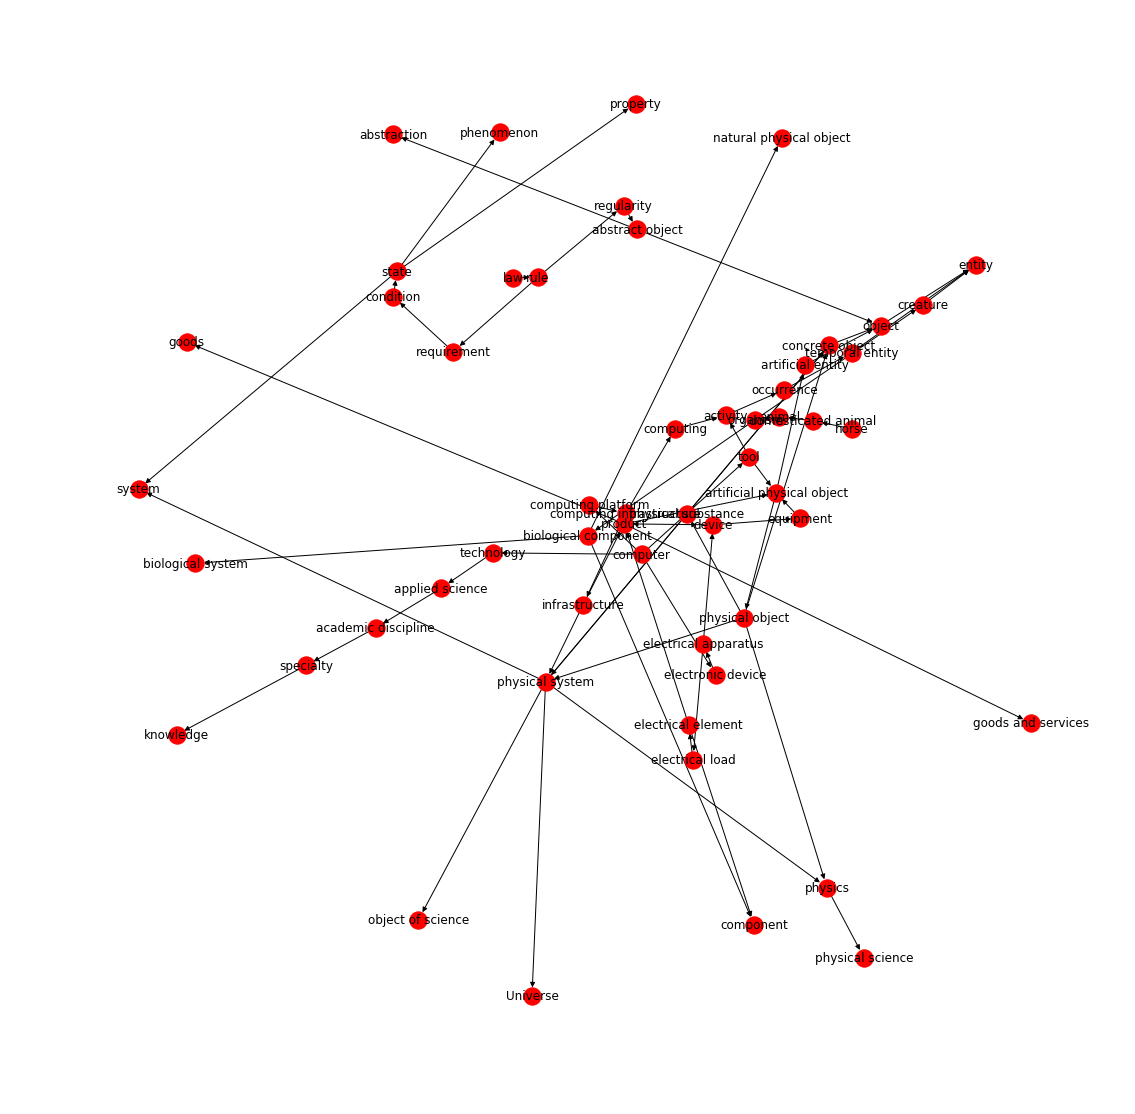

In [13]:
plt.figure(1, figsize=(15,15))
nx.draw(G, with_labels=True, arrows=True)
limits = pylab.axis("off")